In [22]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [23]:
result_df = pd.read_csv('VAE-CF.csv', sep='\t', encoding='utf-8')
result_df = result_df[:241]
result_df = result_df.reset_index(drop=True)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(result_df)

In [24]:
result_df.columns

Index(['Clicks', 'MAP@1', 'MAP@10', 'MAP@5', 'MAP@50', 'NDCG', 'Precision@1',
       'Precision@10', 'Precision@5', 'Precision@50', 'R-Precision',
       'Recall@1', 'Recall@10', 'Recall@5', 'Recall@50',
       'active_learning_model', 'rec_model', 'rank', 'alpha', 'lambda', 'iter',
       'corruption', 'root', 'latent', 'active_learning_iteration',
       'iterative', 'sample_all'],
      dtype='object')

In [25]:
column = ['active_learning_model', 'rec_model', 'iterative', 'latent', 'sample_all', 'active_learning_iteration',
          'MAP@1', 'MAP@5', 'MAP@10', 'MAP@50', 'Precision@1', 'Precision@5', 'Precision@10', 'Precision@50', 
          'Recall@1', 'Recall@10', 'Recall@5', 'Recall@50', 'NDCG', 'R-Precision', 'Clicks', 
          'rank', 'alpha', 'lambda', 'iter', 'corruption', 'root']

In [26]:
# column = ['active_learning_model', 'rec_model', 'sampling', 'active_learning_iteration', 
#           'Clicks', 'MAP@1', 'Precision@1', 'Recall@1', 'NDCG', 'R-Precision', 'Num_Ones_In_Train', 
#           'Num_Ones_In_Prediction', 'total_num_active_learning_iteration', 
#           'Num_Ones_In_Test', 'Num_Zeros_In_Prediction', 
#           'rank', 'alpha', 'lambda', 'iter', 'corruption', 'root']

In [27]:
result_df = result_df[column]
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(result_df)

In [28]:
result_df.rename(columns={'active_learning_model':'Active Learning Model',
                          'rec_model':'Recommendation Model',
                          'iterative':'Iterative',
                          'latent':'Algorithm',
                          'sample_all':'Select',
                          'active_learning_iteration':'Active Learning Iteration'
                         }, 
                 inplace=True)

In [29]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(result_df)

In [30]:
result_df.loc[result_df.Iterative == True, 'Iterative'] = 'Iter'
result_df.loc[result_df.Iterative == False, 'Iterative'] = 'NI'
result_df.loc[result_df.Algorithm == True, 'Algorithm'] = 'Th'
result_df.loc[result_df.Algorithm == False, 'Algorithm'] = 'Gr'
result_df.loc[result_df.Select == True, 'Select'] = 'All'
result_df.loc[result_df.Select == False, 'Select'] = 'Pos'

In [31]:
def extract_mean(metric_result):
    parentheses_index = metric_result.find('(')
    comma_index = metric_result.find(',')
    return np.float64(metric_result[parentheses_index+1: comma_index])

In [32]:
result_df['Clicks'] = result_df['Clicks'].apply(lambda x: extract_mean(x))
result_df['MAP@1'] = result_df['MAP@1'].apply(lambda x: extract_mean(x))
result_df['MAP@5'] = result_df['MAP@5'].apply(lambda x: extract_mean(x))
result_df['MAP@10'] = result_df['MAP@10'].apply(lambda x: extract_mean(x))
result_df['MAP@50'] = result_df['MAP@50'].apply(lambda x: extract_mean(x))
result_df['Precision@1'] = result_df['Precision@1'].apply(lambda x: extract_mean(x))
result_df['Precision@5'] = result_df['Precision@5'].apply(lambda x: extract_mean(x))
result_df['Precision@10'] = result_df['Precision@10'].apply(lambda x: extract_mean(x))
result_df['Precision@50'] = result_df['Precision@50'].apply(lambda x: extract_mean(x))
result_df['Recall@1'] = result_df['Recall@1'].apply(lambda x: extract_mean(x))
result_df['Recall@5'] = result_df['Recall@5'].apply(lambda x: extract_mean(x))
result_df['Recall@10'] = result_df['Recall@10'].apply(lambda x: extract_mean(x))
result_df['Recall@50'] = result_df['Recall@50'].apply(lambda x: extract_mean(x))
result_df['NDCG'] = result_df['NDCG'].apply(lambda x: extract_mean(x))
result_df['R-Precision'] = result_df['R-Precision'].apply(lambda x: extract_mean(x))

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(result_df)

,Active Learning Model,Recommendation Model,Iterative,Algorithm,Select,Active Learning Iteration,MAP@1,MAP@5,MAP@10,MAP@50,Precision@1,Precision@5,Precision@10,Precision@50,Recall@1,Recall@10,Recall@5,Recall@50,NDCG,R-Precision,Clicks,rank,alpha,lambda,iter,corruption,root
0,ThompsonSampling,VAE-CF,Iter,Th,All,50,0.453543,0.406073,0.362158,0.251647,0.453543,0.356220,0.298740,0.185354,0.006441,0.042605,0.025580,0.132428,0.171857,0.130164,0.242362,50,1.0,0.0001,300,0.5,1
1,ThompsonSampling,VAE-CF,Iter,Th,All,50,0.477165,0.417538,0.370571,0.254113,0.477165,0.367874,0.301102,0.186583,0.006781,0.043152,0.026312,0.133134,0.173725,0.131401,0.234331,50,1.0,0.0001,300,0.5,1
2,ThompsonSampling,VAE-CF,Iter,Th,All,50,0.477165,0.413354,0.367048,0.253654,0.477165,0.361260,0.299370,0.186772,0.006825,0.042697,0.025774,0.133346,0.173593,0.131059,0.229134,50,1.0,0.0001,300,0.5,1
3,ThompsonSampling,VAE-CF,Iter,Th,All,50,0.467717,0.421008,0.372869,0.254975,0.467717,0.367244,0.302520,0.186583,0.006691,0.043459,0.026326,0.133128,0.174073,0.131321,0.213858,50,1.0,0.0001,300,0.5,1
4,ThompsonSampling,VAE-CF,Iter,Th,All,50,0.486614,0.418472,0.369857,0.253577,0.486614,0.365984,0.300000,0.187937,0.006992,0.042785,0.026168,0.134462,0.174670,0.132037,0.225827,50,1.0,0.0001,300,0.5,1
5,ThompsonSampling,VAE-CF,Iter,Th,All,50,0.456693,0.408693,0.363170,0.252708,0.456693,0.361575,0.296850,0.187118,0.006506,0.042426,0.025938,0.133430,0.172978,0.130853,0.234331,50,1.0,0.0001,300,0.5,1
6,ThompsonSampling,VAE-CF,Iter,Th,All,50,0.469291,0.422352,0.373997,0.256809,0.469291,0.368189,0.302205,0.188409,0.006703,0.043106,0.026334,0.134240,0.175206,0.132252,0.217480,50,1.0,0.0001,300,0.5,1
7,ThompsonSampling,VAE-CF,Iter,Th,All,50,0.451969,0.418509,0.372035,0.255407,0.451969,0.375748,0.300630,0.187307,0.006527,0.043147,0.026809,0.133829,0.174327,0.131241,0.231496,50,1.0,0.0001,300,0.5,1
8,ThompsonSampling,VAE-CF,Iter,Th,All,50,0.440945,0.405984,0.362530,0.249996,0.440945,0.363780,0.298110,0.184063,0.006299,0.042724,0.026005,0.130983,0.170383,0.129077,0.239370,50,1.0,0.0001,300,0.5,1
9,ThompsonSampling,VAE-CF,Iter,Th,All,50,0.440945,0.395538,0.353502,0.249458,0.440945,0.348031,0.292283,0.183843,0.006277,0.041744,0.024854,0.130842,0.169606,0.128871,0.251811,50,1.0,0.0001,300,0.5,1


In [34]:
# result_df_Iter_Th_All = result_df[(result_df['Iterative'] == 'Iter') &
#                                   (result_df['Algorithm'] == 'Th') &
#                                   (result_df['Select'] == 'All')]

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(result_df_Iter_Th_All)

In [35]:
sns.set_style("ticks")

In [36]:
result_df['Model'] = list(zip(result_df.Iterative, result_df.Algorithm, result_df.Select, result_df['Active Learning Iteration']))

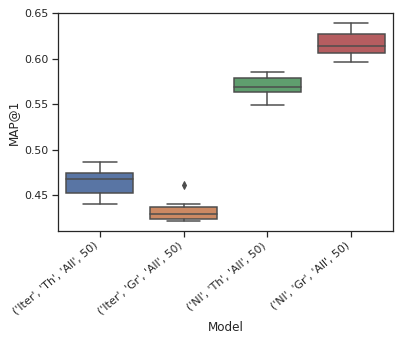

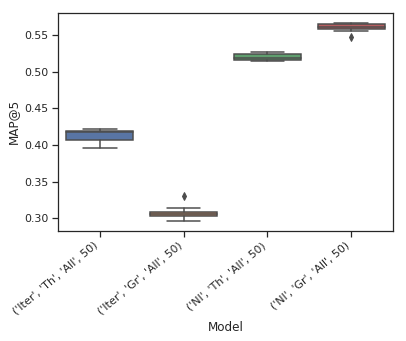

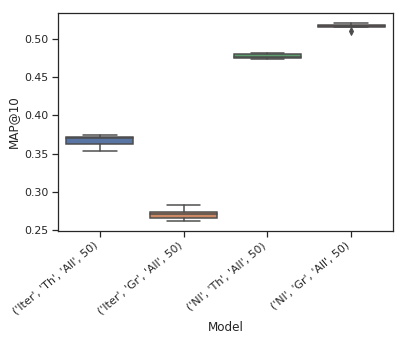

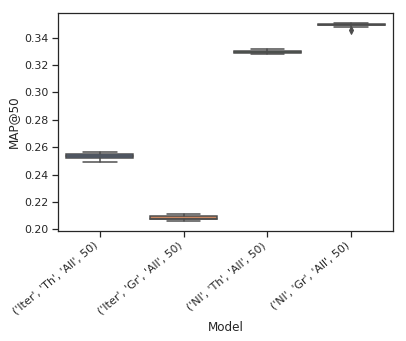

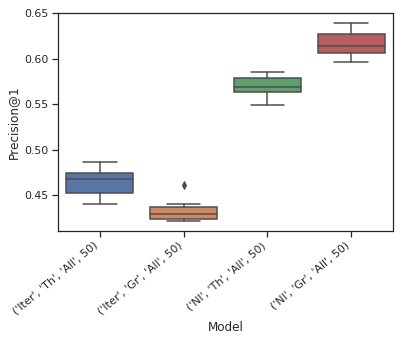

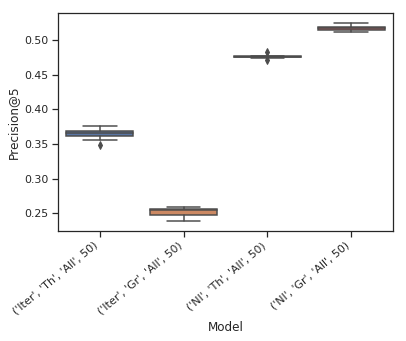

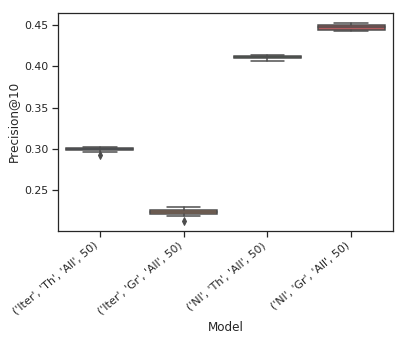

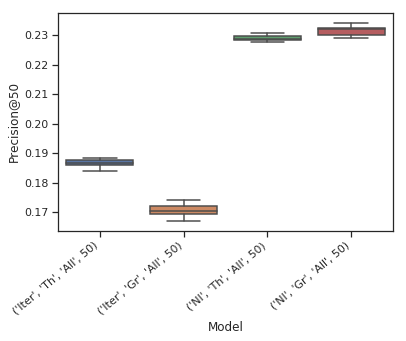

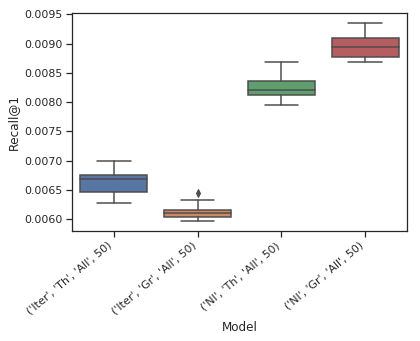

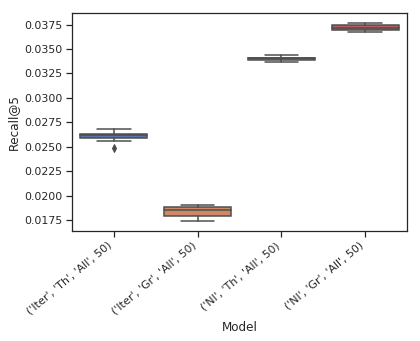

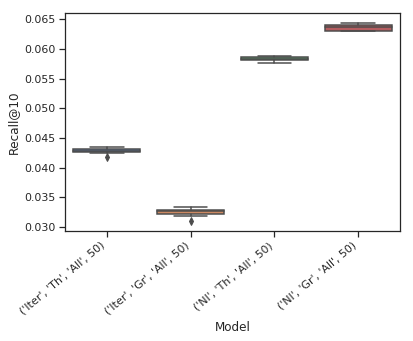

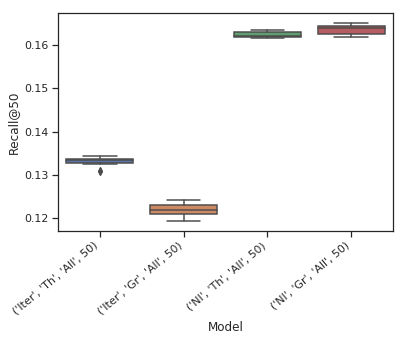

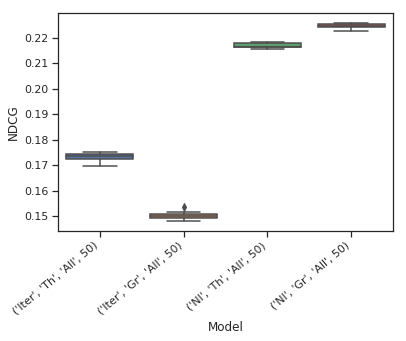

In [37]:
result_df_All_50 = result_df[(result_df['Select'] == 'All') & (result_df['Active Learning Iteration'] == 50)]

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@1", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@5", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@10", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@50", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@1", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@5", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@10", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@50", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@1", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@5", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@10", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@50", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="NDCG", data=result_df_All_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

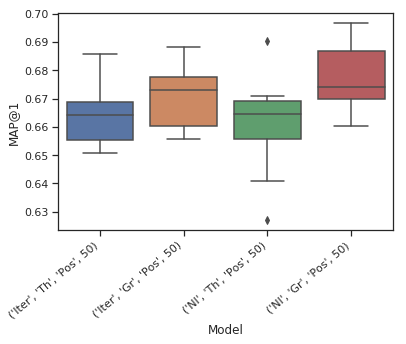

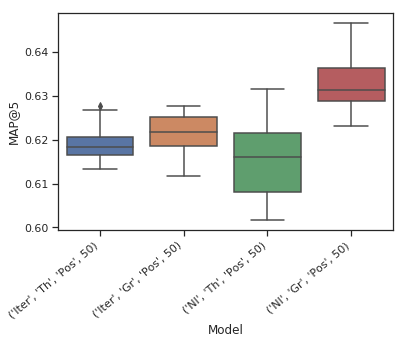

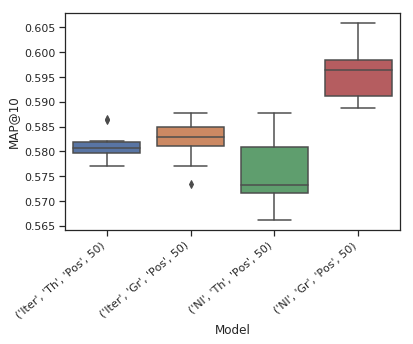

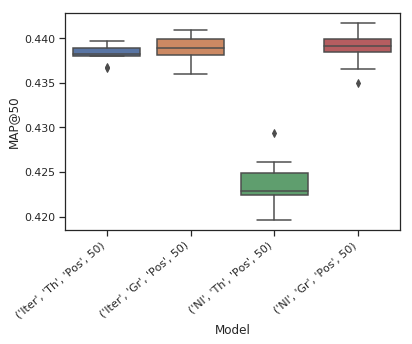

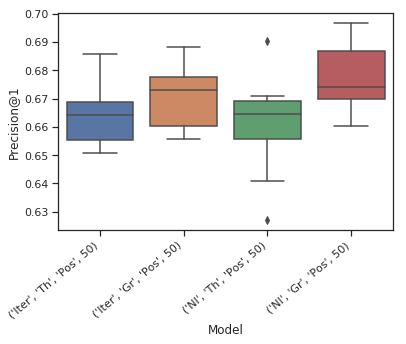

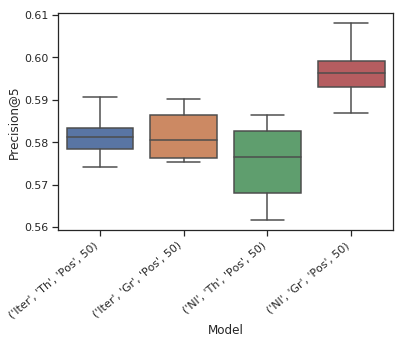

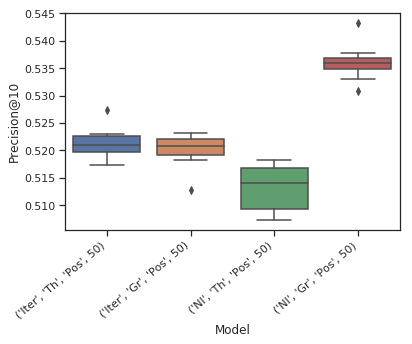

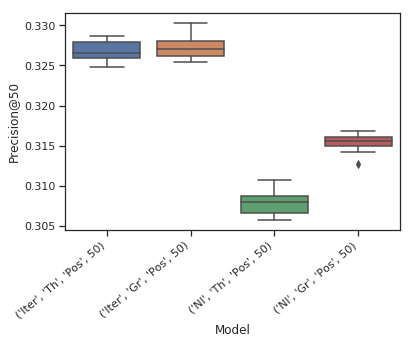

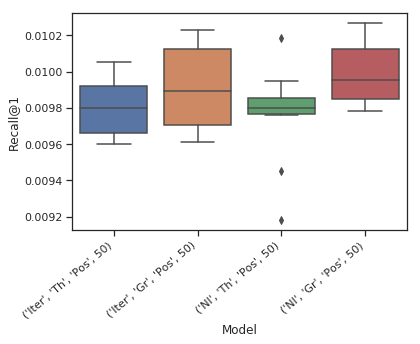

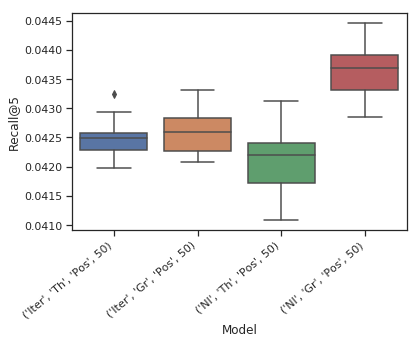

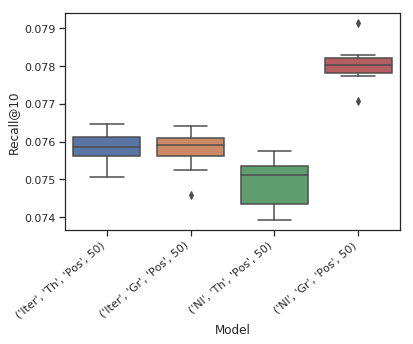

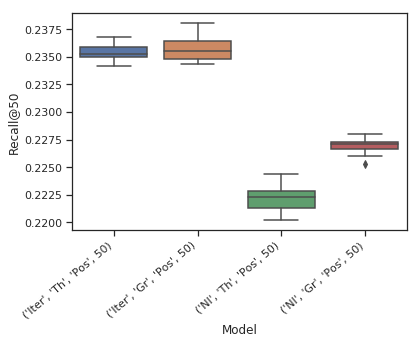

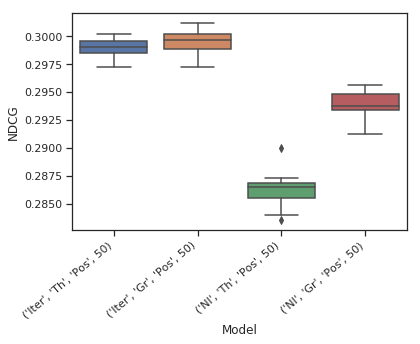

In [17]:
result_df_Pos_50 = result_df[(result_df['Select'] == 'Pos') & (result_df['Active Learning Iteration'] == 50)]

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@1", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@5", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@10", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@50", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@1", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@5", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@10", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@50", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@1", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@5", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@10", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@50", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="NDCG", data=result_df_Pos_50).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

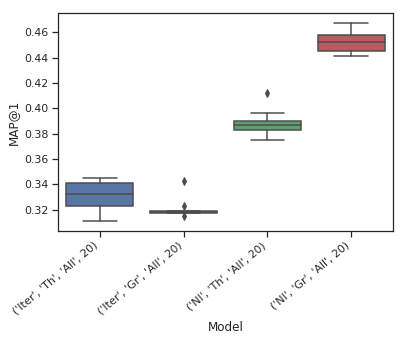

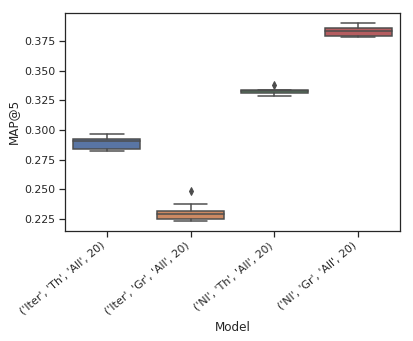

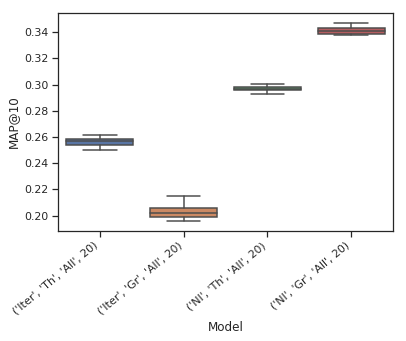

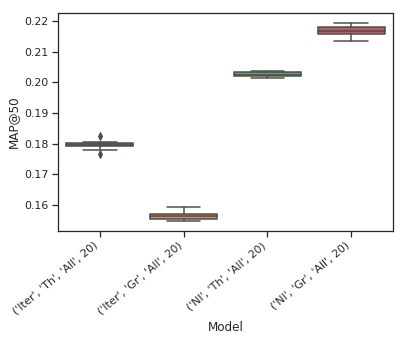

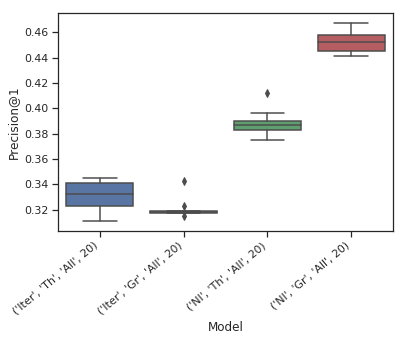

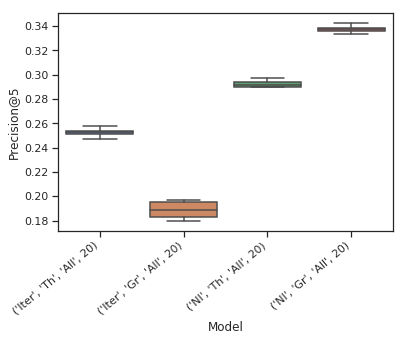

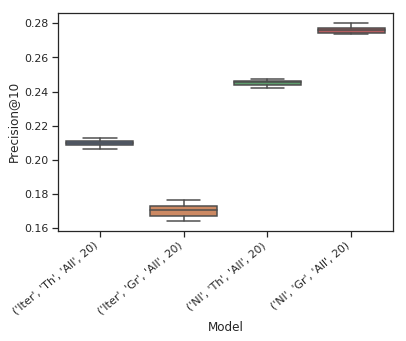

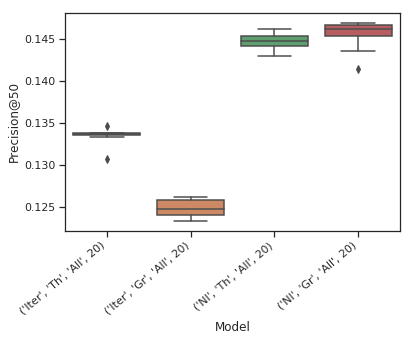

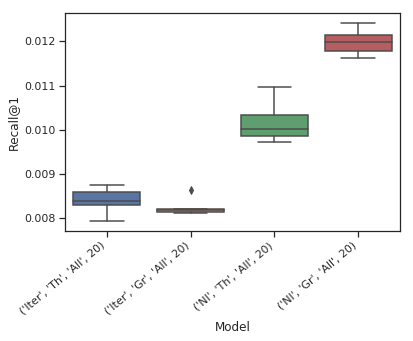

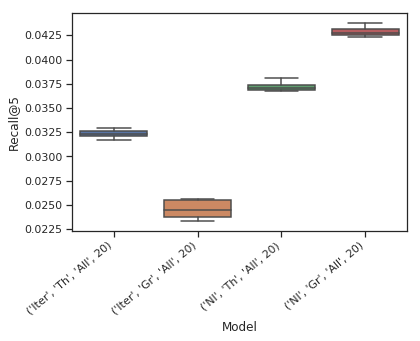

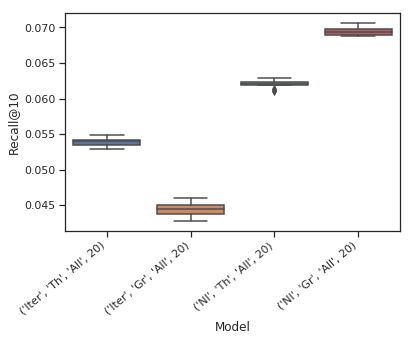

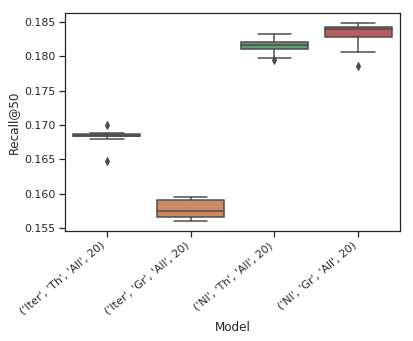

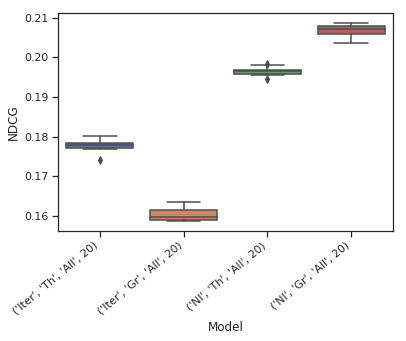

In [18]:
result_df_All_20 = result_df[(result_df['Select'] == 'All') & (result_df['Active Learning Iteration'] == 20)]

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@1", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@5", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@10", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@50", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@1", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@5", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@10", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@50", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@1", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@5", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@10", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@50", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="NDCG", data=result_df_All_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

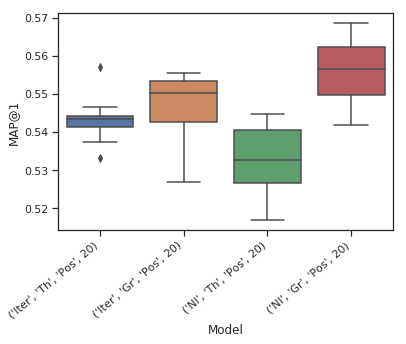

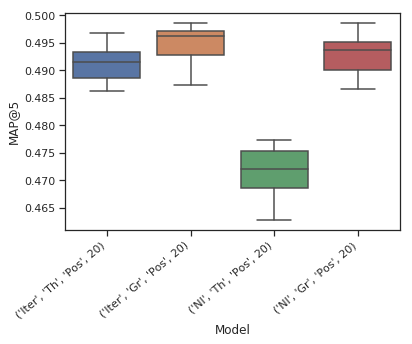

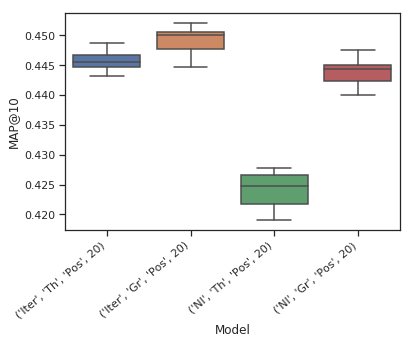

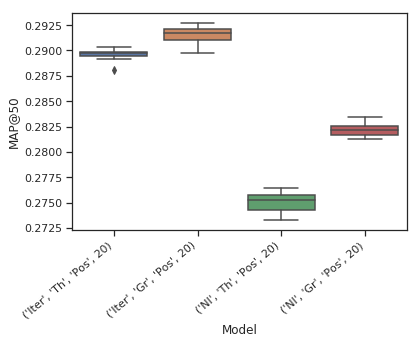

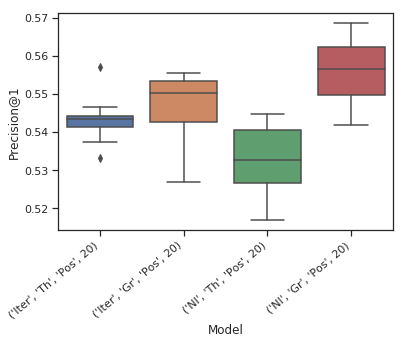

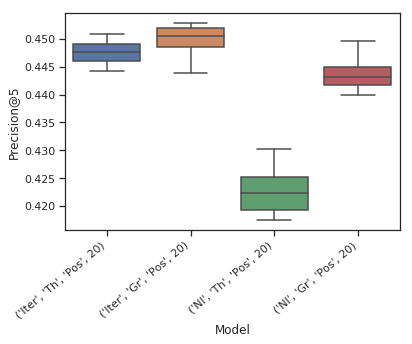

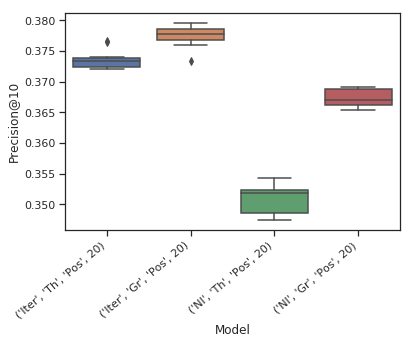

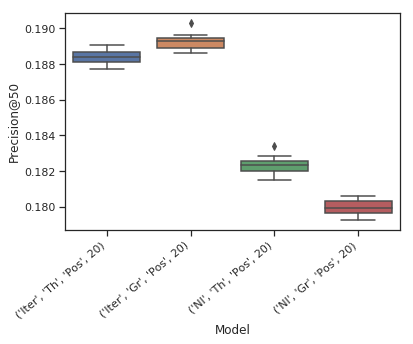

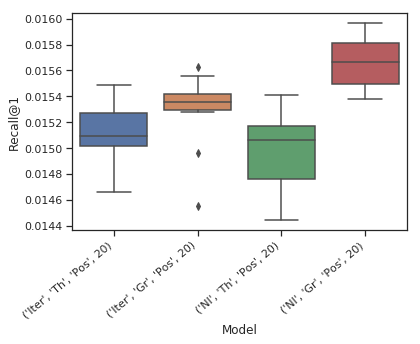

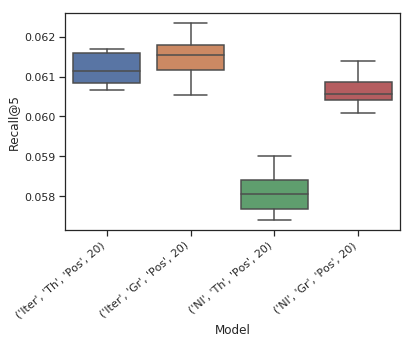

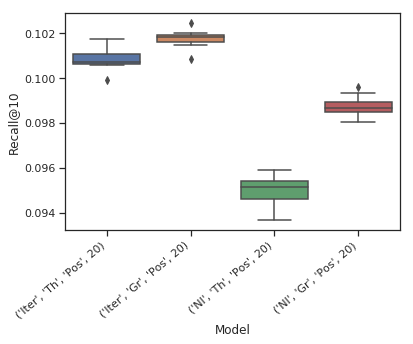

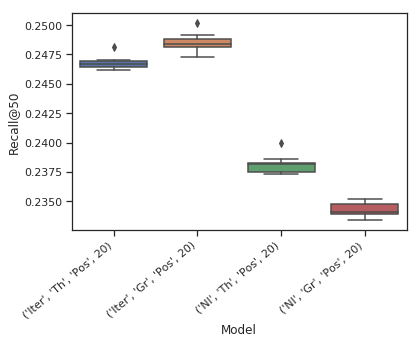

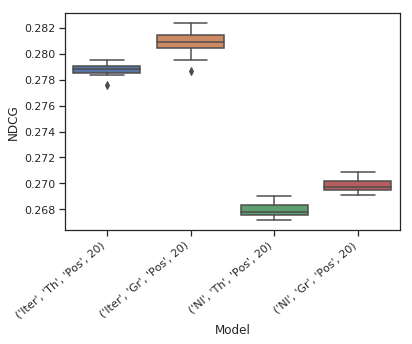

In [19]:
result_df_Pos_20 = result_df[(result_df['Select'] == 'Pos') & (result_df['Active Learning Iteration'] == 20)]

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@1", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@5", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@10", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@50", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@1", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@5", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@10", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@50", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@1", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@5", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@10", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@50", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="NDCG", data=result_df_Pos_20).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

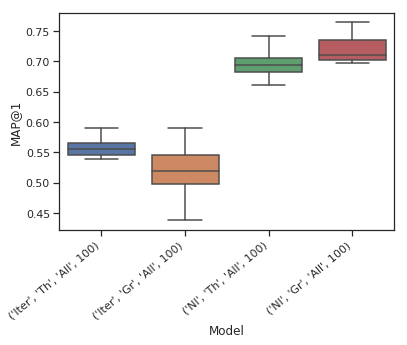

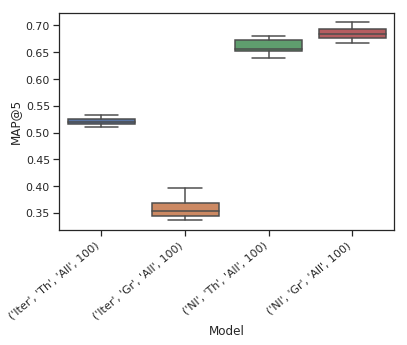

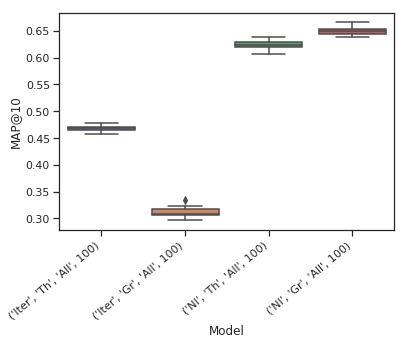

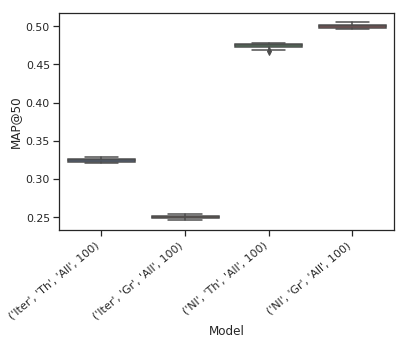

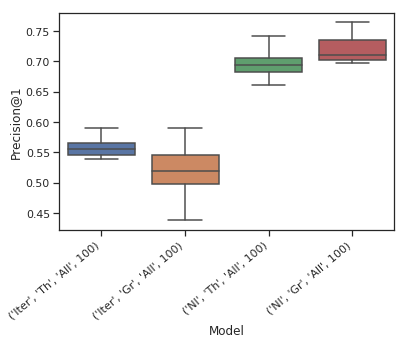

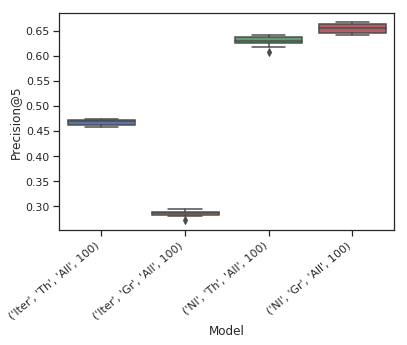

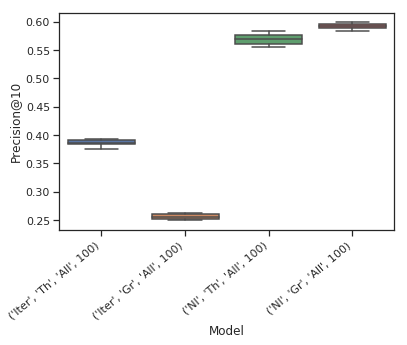

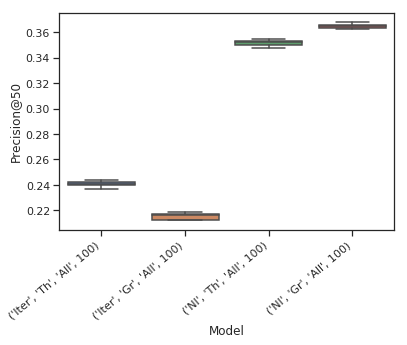

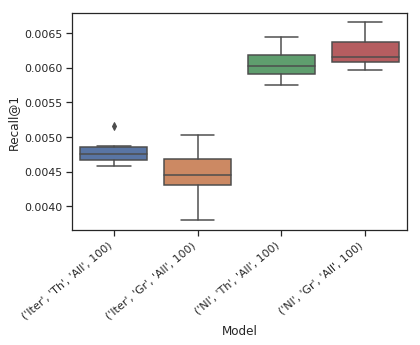

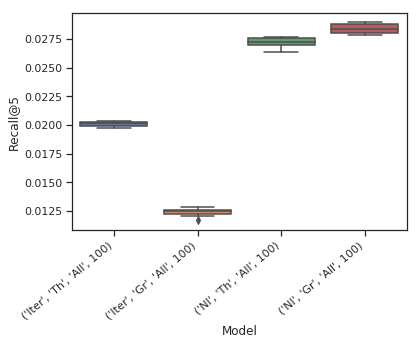

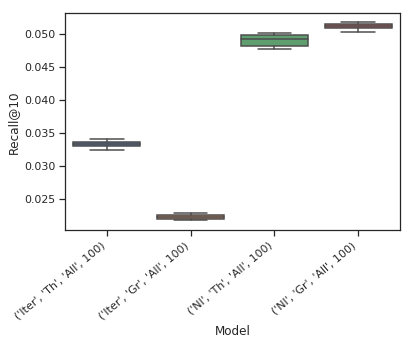

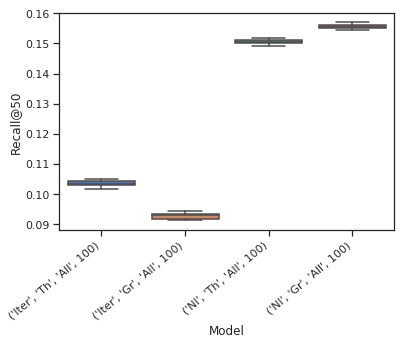

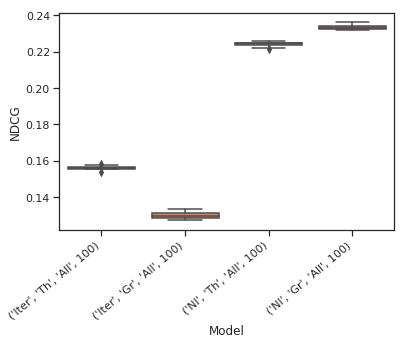

In [20]:
result_df_All_100 = result_df[(result_df['Select'] == 'All') & (result_df['Active Learning Iteration'] == 100)]

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@1", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@5", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@10", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@50", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@1", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@5", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@10", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@50", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@1", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@5", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@10", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@50", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="NDCG", data=result_df_All_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

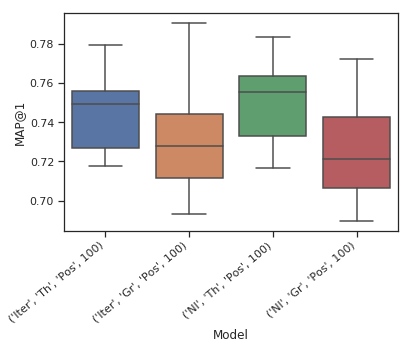

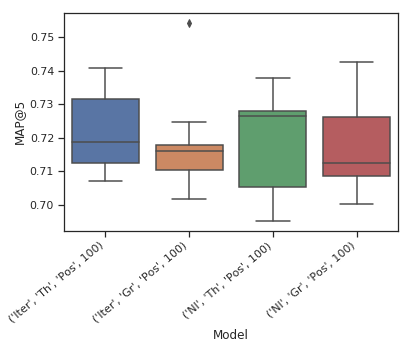

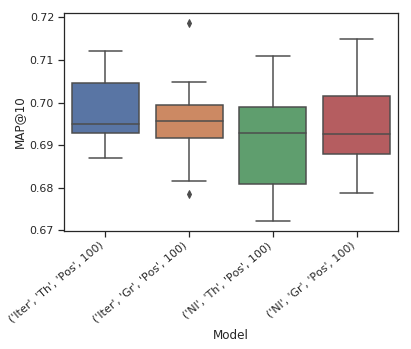

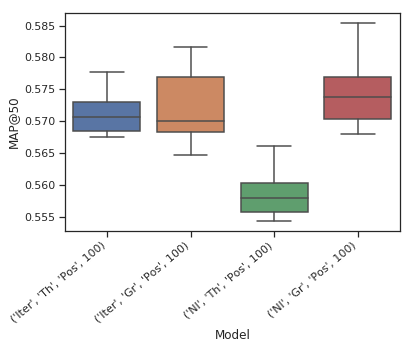

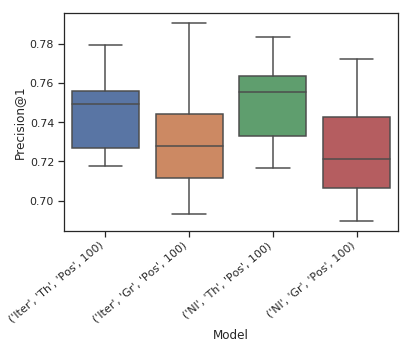

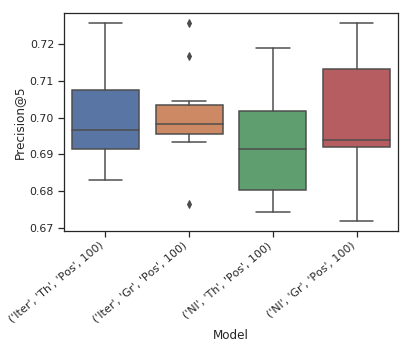

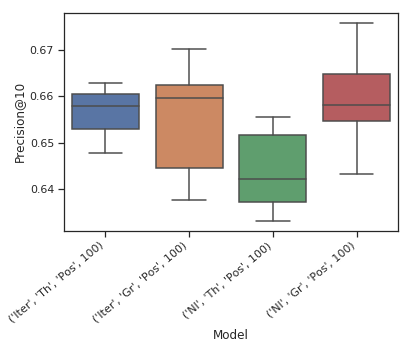

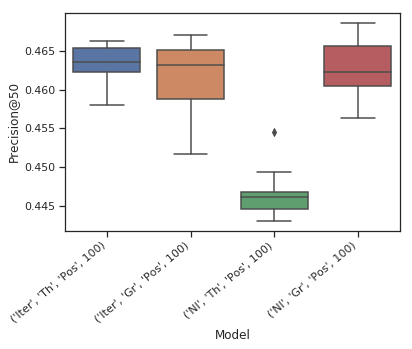

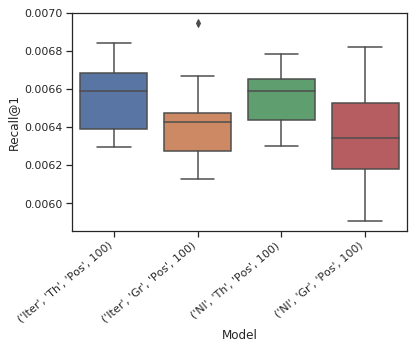

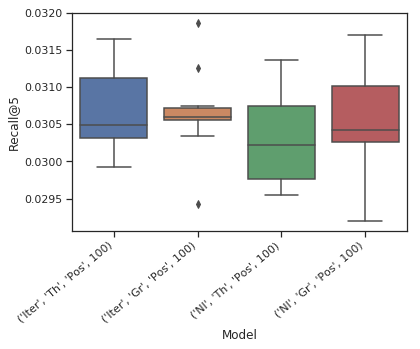

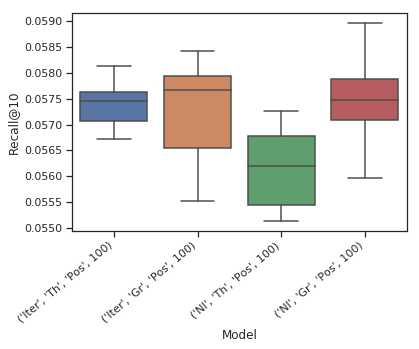

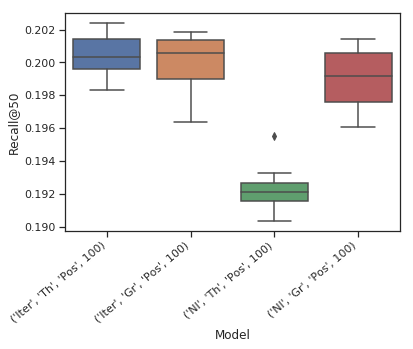

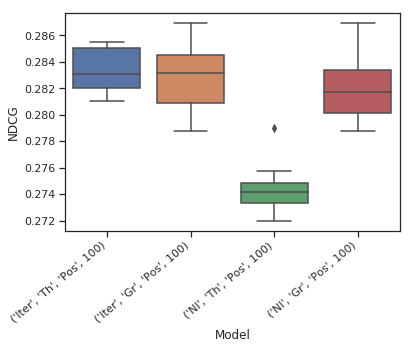

In [21]:
result_df_Pos_100 = result_df[(result_df['Select'] == 'Pos') & (result_df['Active Learning Iteration'] == 100)]

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@1", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@5", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@10", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="MAP@50", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@1", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@5", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@10", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Precision@50", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@1", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@5", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@10", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="Recall@50", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig, ax = plt.subplots()
ax = sns.boxplot(x="Model", y="NDCG", data=result_df_Pos_100).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [10]:
result_df_sampling_false = result_df[result_df['Sampling'] == False]

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(result_df_sampling_false)

In [11]:
result_df_sampling_true = result_df[result_df['Sampling'] == True]

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(result_df_sampling_true)

In [12]:
sns.set_style("ticks")

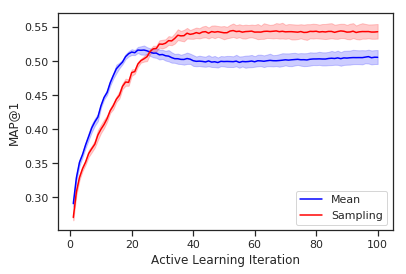

In [13]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="Active Learning Iteration", y="MAP@1", color="blue", data=result_df_sampling_false, label="Mean")
ax = sns.lineplot(x="Active Learning Iteration", y="MAP@1", color="red", data=result_df_sampling_true, label="Sampling")

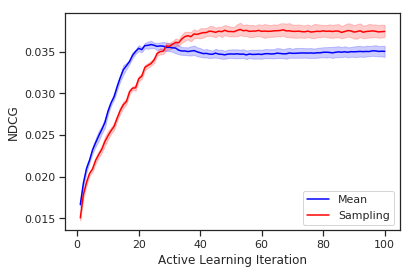

In [14]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="Active Learning Iteration", y="NDCG", color="blue", data=result_df_sampling_false, label="Mean")
ax = sns.lineplot(x="Active Learning Iteration", y="NDCG", color="red", data=result_df_sampling_true, label="Sampling")

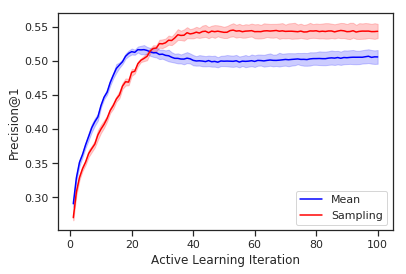

In [15]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="Active Learning Iteration", y="Precision@1", color="blue", data=result_df_sampling_false, label="Mean")
ax = sns.lineplot(x="Active Learning Iteration", y="Precision@1", color="red", data=result_df_sampling_true, label="Sampling")

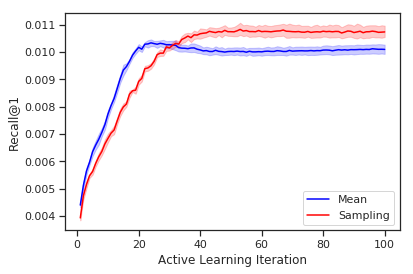

In [16]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="Active Learning Iteration", y="Recall@1", color="blue", data=result_df_sampling_false, label="Mean")
ax = sns.lineplot(x="Active Learning Iteration", y="Recall@1", color="red", data=result_df_sampling_true, label="Sampling")

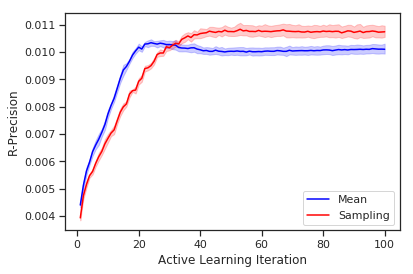

In [17]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="Active Learning Iteration", y="R-Precision", color="blue", data=result_df_sampling_false, label="Mean")
ax = sns.lineplot(x="Active Learning Iteration", y="R-Precision", color="red", data=result_df_sampling_true, label="Sampling")

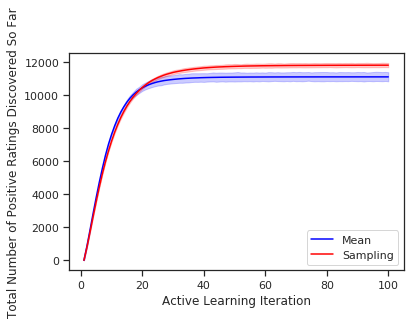

In [18]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="Active Learning Iteration", y="Total Number of Positive Ratings Discovered So Far", color="blue", data=result_df_sampling_false, label="Mean")
ax = sns.lineplot(x="Active Learning Iteration", y="Total Number of Positive Ratings Discovered So Far", color="red", data=result_df_sampling_true, label="Sampling")

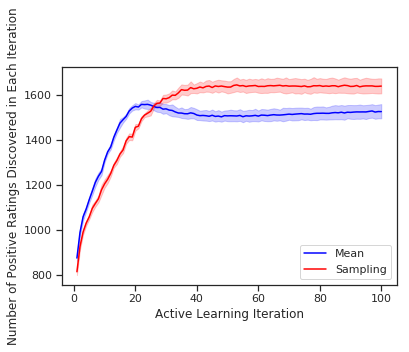

In [19]:
fig, ax = plt.subplots()

ax = sns.lineplot(x="Active Learning Iteration", y="Number of Positive Ratings Discovered in Each Iteration", color="blue", data=result_df_sampling_false, label="Mean")
ax = sns.lineplot(x="Active Learning Iteration", y="Number of Positive Ratings Discovered in Each Iteration", color="red", data=result_df_sampling_true, label="Sampling")